In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import matplotlib.mlab as mlab
import seaborn as sns
import struct
from sklearn.cluster import KMeans
import pprint
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree

import operator
from sklearn.preprocessing import LabelEncoder
import math
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
import tests as t
from IPython import display
import time
from mpl_toolkits.mplot3d import Axes3D
import pickle
from plotly.offline import iplot, init_notebook_mode
from pandas import Series
from numpy.random import randn
import graphviz
import pydot
import django
import pyparsing
from matplotlib.ticker import FuncFormatter, MaxNLocator
from sklearn import preprocessing
from sklearn import utils


# magic word for producing visualizations in notebook
%matplotlib inline

# see all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# Questions:

- Is there any connection between getting up early and salary?
- Which model can predict the best?
- Which feature is most important to predicting salary?

In [2]:
#Load the data and take a look
data_scienc = pd.read_csv('./survey_results_public.csv', low_memory = False) 
data_scienc_question = pd.read_csv('./survey_results_schema.csv') # the questions that is asked
data_scienc.head(3)

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,4.0,2.0,5.0,5.0,6.0,7.0,2.0,1.0,4.0,3.0,My job status or other personal status changed,NaN,NaN,Monthly,NaN,KES,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,1,Agile;Scrum,Git,Multiple times per day,Yes,No,NaN,Strongly agree,Strongly agree,Strongly agree,Saw an online advertisement and then researche...,1.0,5.0,4.0,7.0,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,Unite

In [3]:
data_scienc_question.head(3)

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,Hobby,Do you code as a hobby?
2,OpenSource,Do you contribute to open source projects?


In [4]:
#https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe
def missing_values_table(data_scienc):
    mis_val = data_scienc.isnull().sum()
    mis_val_percent = 100 * data_scienc.isnull().sum() / len(data_scienc)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(data_scienc.shape[1]) + " columns.\n"
           "There are " + str(mis_val_table_ren_columns.shape[0]) +
           " columns that have missing values.")
    return mis_val_table_ren_columns

In [5]:
missing_values_table(data_scienc)

Your selected dataframe has 129 columns.
There are 126 columns that have missing values.


,Missing Values,% of Total Values
TimeAfterBootcamp,92203,93.3
MilitaryUS,83074,84.0
HackathonReasons,73164,74.0
ErgonomicDevices,64797,65.5
AdBlockerReasons,61110,61.8
StackOverflowJobsRecommend,60538,61.2
JobEmailPriorities4,52642,53.3
JobEmailPriorities7,52642,53.3
JobEmailPriorities6,52642,53.3
JobEmailPriorities5,52642,53.3


# Which columns to keep

In [6]:
##Whic columns I will use in the calculations
data_scienc.drop([
'Respondent',
'Hobby',
'OpenSource',
'Country',
'Student',
'Employment',
'FormalEducation',
'UndergradMajor',
'CompanySize',
'DevType',
'YearsCoding',
'YearsCodingProf',
'JobSatisfaction',
'CareerSatisfaction',
'HopeFiveYears',
'JobSearchStatus',
'LastNewJob',
'AssessJob1',
'AssessJob2',
'AssessJob3',
'AssessJob4',
'AssessJob5',
'AssessJob6',
'AssessJob7',
'AssessJob8',
'AssessJob9',
'AssessJob10',
'AssessBenefits1',
'AssessBenefits2',
'AssessBenefits3',
'AssessBenefits4',
'AssessBenefits5',
'AssessBenefits6',
'AssessBenefits7',
'AssessBenefits8',
'AssessBenefits9',
'AssessBenefits10',
'AssessBenefits11',
'JobContactPriorities1',
'JobContactPriorities2',
'JobContactPriorities3',
'JobContactPriorities4',
'JobContactPriorities5',
'JobEmailPriorities1',
'JobEmailPriorities2',
'JobEmailPriorities3',
'JobEmailPriorities4',
'JobEmailPriorities5',
'JobEmailPriorities6',
'JobEmailPriorities7',
'UpdateCV',
'Currency',
'Salary',
'SalaryType',
#    ConvertedSalary,
'CurrencySymbol',
'CommunicationTools',
'TimeFullyProductive',
'EducationTypes',
'SelfTaughtTypes',
'TimeAfterBootcamp',
'HackathonReasons',
'AgreeDisagree1',
'AgreeDisagree2',
'AgreeDisagree3',
'LanguageWorkedWith',
'LanguageDesireNextYear',
'DatabaseWorkedWith',
'DatabaseDesireNextYear',
'PlatformWorkedWith',
'PlatformDesireNextYear',
'FrameworkWorkedWith',
'FrameworkDesireNextYear',
'IDE',
'OperatingSystem',
'NumberMonitors',
'Methodology',
'VersionControl',
'CheckInCode',
'AdBlocker',
'AdBlockerDisable',
'AdBlockerReasons',
'AdsAgreeDisagree1',
'AdsAgreeDisagree2',
'AdsAgreeDisagree3',
'AdsActions',
'AdsPriorities1',
'AdsPriorities2',
'AdsPriorities3',
'AdsPriorities4',
'AdsPriorities5',
'AdsPriorities6',
'AdsPriorities7',
'AIDangerous',
'AIInteresting',
'AIResponsible',
'AIFuture',
'EthicsChoice',
'EthicsReport',
'EthicsResponsible',
'EthicalImplications',
'StackOverflowRecommend',
'StackOverflowVisit',
'StackOverflowHasAccount',
'StackOverflowParticipate',
'StackOverflowJobs',
'StackOverflowDevStory',
'StackOverflowJobsRecommend',
'StackOverflowConsiderMember',
'HypotheticalTools1',
'HypotheticalTools2',
'HypotheticalTools3',
'HypotheticalTools4',
'HypotheticalTools5',
#    WakeTime,
#    HoursComputer,
#    HoursOutside,
#    SkipMeals,
'ErgonomicDevices',
#    Exercise,
 'Gender',
'SexualOrientation',
'EducationParents',
'RaceEthnicity',
#    Age,
'Dependents',
'MilitaryUS',
'SurveyTooLong',
'SurveyEasy'
 ], axis=1, inplace=True)

In [7]:
## Take a look at wich columns that have missing values
missing_values_table(data_scienc)

Your selected dataframe has 7 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
ConvertedSalary,51153,51.7
Age,34281,34.7
SkipMeals,26909,27.2
HoursOutside,26831,27.1
Exercise,26747,27.1
HoursComputer,26722,27.0
WakeTime,26709,27.0


### Make a mean replasement for the NaN valuse in the ConvertedSalary column.

In [8]:
## Make mean values for the NaN values in one column
data_scienc['ConvertedSalary'] = data_scienc['ConvertedSalary'].fillna((data_scienc['ConvertedSalary'].mean()))

In [9]:
## Just a test to see that the column is out:
missing_values_table(data_scienc)

Your selected dataframe has 7 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
Age,34281,34.7
SkipMeals,26909,27.2
HoursOutside,26831,27.1
Exercise,26747,27.1
HoursComputer,26722,27.0
WakeTime,26709,27.0


### Clearing the data
Take out all the rows with NaN valus. Since I have replaced all the NaN values in the Salary columns we onlye take away the respondet that not have ansverad for the features that I am looking in to. And then I one-hot encode this features.

Will than have over 63.000 respondet so it should be big enought to say any sensible about the features seleckted.

## Categorical variables
For the categorical features like wake-up time I do not want to make wake up time early weight more than late or random wake up time, has therefore made a random split of the features. Basically, because I want to see which of the features are most important ant not what I think is most important for predicting the salary. This is regarding to all the features I have choose. Applies both to, waketime, exercise, skip meal, out time, Hours Computer and Age. If I have chosen I would make early waketime and the highest hours computer weight more than the others. 

In [10]:
# Take out the rows with NaN values:
data_scienc_without_NaN = data_scienc[data_scienc.isnull().sum(axis = 1) < 1].reset_index(drop = True)

In [11]:
# Check
missing_values_table(data_scienc_without_NaN)

Your selected dataframe has 7 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [12]:
data_scienc_without_NaN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63493 entries, 0 to 63492
Data columns (total 7 columns):
ConvertedSalary    63493 non-null float64
WakeTime           63493 non-null object
HoursComputer      63493 non-null object
HoursOutside       63493 non-null object
SkipMeals          63493 non-null object
Exercise           63493 non-null object
Age                63493 non-null object
dtypes: float64(1), object(6)
memory usage: 3.4+ MB


In [13]:
# One-hot encode the data using pandas get_dummies:
data_scienc_without_NaN = pd.get_dummies(data_scienc_without_NaN)
# Display the first 5 rows:
data_scienc_without_NaN.head(5)

,ConvertedSalary,WakeTime_After 12:01 PM,WakeTime_Before 5:00 AM,WakeTime_Between 10:01 - 11:00 AM,WakeTime_Between 11:01 AM - 12:00 PM,WakeTime_Between 5:00 - 6:00 AM,WakeTime_Between 6:01 - 7:00 AM,WakeTime_Between 7:01 - 8:00 AM,WakeTime_Between 8:01 - 9:00 AM,WakeTime_Between 9:01 - 10:00 AM,WakeTime_I do not have a set schedule,WakeTime_I work night shifts,HoursComputer_1 - 4 hours,HoursComputer_5 - 8 hours,HoursComputer_9 - 12 hours,HoursComputer_Less than 1 hour,HoursComputer_Over 12 hours,HoursOutside_1 - 2 hours,HoursOutside_3 - 4 hours,HoursOutside_30 - 59 minutes,HoursOutside_Less than 30 minutes,HoursOutside_Over 4 hours,SkipMeals_1 - 2 times per week,SkipMeals_3 - 4 times per week,SkipMeals_Daily or almost every day,SkipMeals_Never,Exercise_1 - 2 times per week,Exercise_3 - 4 times per week,Exercise_Daily or almost every day,Exercise_I don't typically exercise,Age_18 - 24 years old,Age_25 - 34 years old,Age_35 - 44 years old,Age_45 - 54 years old,Age_55 - 64 years old,Age_65 years or older,Age_Under 18 years old
0,95782.958115,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
1,70841.000000,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
2,95782.958115,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,21426.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0
4,41671.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [14]:
## check of the new columns:
data_scienc_without_NaN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63493 entries, 0 to 63492
Data columns (total 37 columns):
ConvertedSalary                          63493 non-null float64
WakeTime_After 12:01 PM                  63493 non-null uint8
WakeTime_Before 5:00 AM                  63493 non-null uint8
WakeTime_Between 10:01 - 11:00 AM        63493 non-null uint8
WakeTime_Between 11:01 AM - 12:00 PM     63493 non-null uint8
WakeTime_Between 5:00 - 6:00 AM          63493 non-null uint8
WakeTime_Between 6:01 - 7:00 AM          63493 non-null uint8
WakeTime_Between 7:01 - 8:00 AM          63493 non-null uint8
WakeTime_Between 8:01 - 9:00 AM          63493 non-null uint8
WakeTime_Between 9:01 - 10:00 AM         63493 non-null uint8
WakeTime_I do not have a set schedule    63493 non-null uint8
WakeTime_I work night shifts             63493 non-null uint8
HoursComputer_1 - 4 hours                63493 non-null uint8
HoursComputer_5 - 8 hours                63493 non-null uint8
HoursComputer_9 - 12 

### Make the selection for the models I will use
Splitt into training and test sets, and the features that I will try to predict

In [15]:
# What I want to predict:
salary = np.array(data_scienc_without_NaN['ConvertedSalary'])
# Take out the column:
data_scienc_without_NaN= data_scienc_without_NaN.drop('ConvertedSalary', axis = 1)
# Save for later:
data_scienc_without_NaN_list = list(data_scienc_without_NaN.columns)
# Convert:
data_scienc_without_NaN = np.array(data_scienc_without_NaN)

In [16]:
# Split the data into train and test sets:
X = data_scienc_without_NaN
y = salary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [17]:
## Just to check the shapes:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(44445, 36)
(44445,)
(19048, 36)
(19048,)


# RANDOM FOREST REGRESSION

In [18]:
# Start with 10 decision trees
rf = RandomForestRegressor(n_estimators = 10, random_state = 42) 
# Train the model:
rf.fit(X_train, y_train);
##se om jeg får noe her

y_test_pred = rf.predict(X_test)
errors = abs(y_test_pred - y_test)

# some check points to see how fare off the model is......
print('Predicted r2 score: ',r2_score(y_test, y_test_pred))  
print('Mean Squared Error:',mean_squared_error(y_test, y_test_pred)) 
print('Mean Absolute Error:', round(errors.mean(), 2), '$.')   
print('Predicted max value: ', y_test_pred.max())
print('Predicted min value: ',y_test_pred.min())
print('Predicted mean value: ',y_test_pred.mean())

Predicted r2 score:  -0.07657373316898397
Mean Squared Error: 29351800238.51853
Mean Absolute Error: 67056.95 $.
Predicted max value:  1342291.6666666665
Predicted min value:  4464.086666666667
Predicted mean value:  96191.81336851089


In [19]:
# Difference between actaul and predicted
pred_vs_act = pd.DataFrame(np.hstack([y_test.reshape(y_test.size,1), y_test_pred.reshape(y_test.size,1)]))
pred_vs_act.columns = ['actual', 'pred']
pred_vs_act['diff'] = pred_vs_act['actual'] - pred_vs_act['pred']
pred_vs_act.head()

,actual,pred,diff
0,5640.000000,63450.166248,-57810.166248
1,95782.958115,72191.515738,23591.442377
2,91791.000000,71101.279500,20689.720500
3,18288.000000,86905.877072,-68617.877072
4,100000.000000,101202.358649,-1202.358649


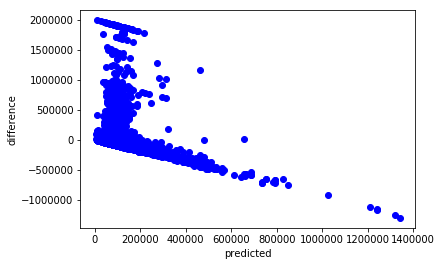

In [20]:
## Make at plot on the differences
plt.plot(pred_vs_act['pred'], pred_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');

In [21]:
## Model with 100 decision trees - see if it is bether than with 10......
rf = RandomForestRegressor(n_estimators = 100, random_state = 42) #n_estimators = 1000
# Train the model on training data
rf.fit(X_train, y_train);


y_test_pred = rf.predict(X_test)
errors = abs(y_test_pred - y_test)

# some check points to see how fare off the model is......
print('Predicted r2 score: ',r2_score(y_test, y_test_pred))  
print('Mean Squared Error:',mean_squared_error(y_test, y_test_pred)) 
print('Mean Absolute Error:', round(errors.mean(), 2), '$.')   
print('Predicted max value: ', y_test_pred.max())
print('Predicted min value: ',y_test_pred.min())
print('Predicted mean value: ',y_test_pred.mean())

Predicted r2 score:  -0.06510020126789584
Mean Squared Error: 29038984863.207733
Mean Absolute Error: 66679.36 $.
Predicted max value:  1278311.8936779732
Predicted min value:  6246.490914482972
Predicted mean value:  96357.739831277


In [22]:
# check the difference between actaul and predicted
pred_vs_act = pd.DataFrame(np.hstack([y_test.reshape(y_test.size,1), y_test_pred.reshape(y_test.size,1)]))
pred_vs_act.columns = ['actual', 'pred']
pred_vs_act['diff'] = pred_vs_act['actual'] - pred_vs_act['pred']
pred_vs_act.head()

,actual,pred,diff
0,5640.000000,63574.456681,-57934.456681
1,95782.958115,73011.212494,22771.745621
2,91791.000000,71770.744120,20020.255880
3,18288.000000,85647.743469,-67359.743469
4,100000.000000,96992.735526,3007.264474


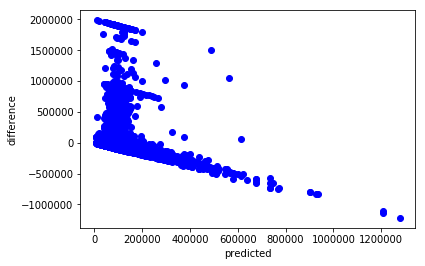

In [23]:
## Make at plot on the differences
plt.plot(pred_vs_act['pred'], pred_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');

In [24]:
## Model with 1000 decision trees - see if it is bether than with 100......
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42) #n_estimators = 1000
# Train the model
rf.fit(X_train, y_train);


y_test_pred = rf.predict(X_test)
errors = abs(y_test_pred - y_test)
RF_r2_score = r2_score(y_test, y_test_pred)

# some check points to see how fare off the model is......
print('Predicted r2 score: ',r2_score(y_test, y_test_pred))  
print('Mean Squared Error:',mean_squared_error(y_test, y_test_pred)) 
print('Mean Absolute Error:', round(errors.mean(), 2), '$.')   
print('Predicted max value: ', y_test_pred.max())
print('Predicted min value: ',y_test_pred.min())
print('Predicted mean value: ',y_test_pred.mean())

Predicted r2 score:  -0.06412703572521772
Mean Squared Error: 29012452392.90157
Mean Absolute Error: 66721.51 $.
Predicted max value:  1250407.36244848
Predicted min value:  6491.856929123583
Predicted mean value:  96531.87224595418


In [25]:
# check the difference between actaul and predicted
pred_vs_act = pd.DataFrame(np.hstack([y_test.reshape(y_test.size,1), y_test_pred.reshape(y_test.size,1)]))
pred_vs_act.columns = ['actual', 'pred']
pred_vs_act['diff'] = pred_vs_act['actual'] - pred_vs_act['pred']
pred_vs_act.head()

,actual,pred,diff
0,5640.000000,58884.923170,-53244.923170
1,95782.958115,72910.587265,22872.370850
2,91791.000000,71815.935822,19975.064178
3,18288.000000,90174.555548,-71886.555548
4,100000.000000,95975.579386,4024.420614


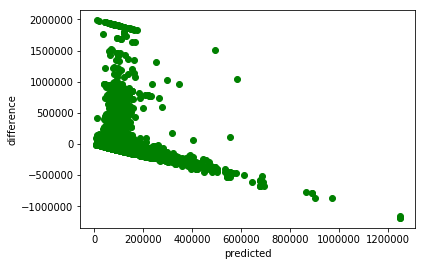

In [26]:
## Make at plot on the differences
plt.plot(pred_vs_act['pred'], pred_vs_act['diff'], 'bo', color = 'green'); #'bo'
plt.xlabel('predicted');
plt.ylabel('difference');

## Calculat the features that have most impact on the result

In [27]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(data_scienc_without_NaN, round(importance, 2)) for data_scienc_without_NaN, importance in zip(data_scienc_without_NaN_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: SkipMeals_1 - 2 times per week Importance: 0.06
Variable: HoursComputer_5 - 8 hours Importance: 0.05
Variable: HoursComputer_9 - 12 hours Importance: 0.05
Variable: HoursComputer_Over 12 hours Importance: 0.05
Variable: HoursOutside_1 - 2 hours Importance: 0.05
Variable: HoursOutside_30 - 59 minutes Importance: 0.05
Variable: SkipMeals_Never      Importance: 0.05
Variable: Exercise_1 - 2 times per week Importance: 0.05
Variable: WakeTime_Between 7:01 - 8:00 AM Importance: 0.04
Variable: HoursOutside_Less than 30 minutes Importance: 0.04
Variable: Exercise_3 - 4 times per week Importance: 0.04
Variable: Exercise_Daily or almost every day Importance: 0.04
Variable: WakeTime_Between 5:00 - 6:00 AM Importance: 0.03
Variable: WakeTime_Between 6:01 - 7:00 AM Importance: 0.03
Variable: WakeTime_Between 8:01 - 9:00 AM Importance: 0.03
Variable: WakeTime_Between 9:01 - 10:00 AM Importance: 0.03
Variable: HoursOutside_3 - 4 hours Importance: 0.03
Variable: SkipMeals_3 - 4 times per wee

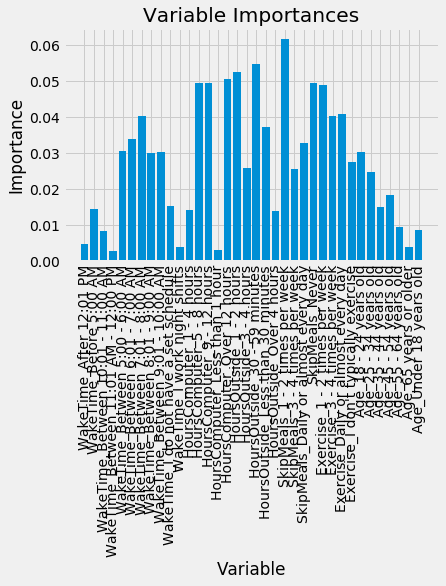

In [28]:
## Make a grap with the most importent values for the prediction
# Set the style
plt.style.use('fivethirtyeight')
# x values for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
#plt.bar(x_values, importances, orientation = 'horizontal')
# labels for x 
plt.xticks(x_values, data_scienc_without_NaN_list, rotation='vertical')
#plt.xticks(x_values, data_scienc_without_NaN_list, rotation='horizontal')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# LINEARREGRESSION

In [29]:
lr_model = LinearRegression(normalize=True) # Here you could set any hyperparameters of your model
lr_model.fit(X_train, y_train) # If this model was to predict for new individuals, we probably would want
               # worry about train/test splits and cross-validation, but for now I am most 
               # interested in finding a model that just fits all of the data well

        
y_test_pred = lr_model.predict(X_test) 
errors = abs(y_test_pred - y_test)
LR_r2_score = r2_score(y_test, y_test_pred)

# some check points to see how fare off the model is......
print('Predicted r2 score: ',r2_score(y_test, y_test_pred))  
print('Mean Squared Error:',mean_squared_error(y_test, y_test_pred)) 
print('Mean Absolute Error:', round(errors.mean(), 2), '$.')   
print('Predicted max value: ', y_test_pred.max())
print('Predicted min value: ',y_test_pred.min())
print('Predicted mean value: ',y_test_pred.mean())

Predicted r2 score:  0.013162118821971935
Mean Squared Error: 26905234136.521343
Mean Absolute Error: 60362.43 $.
Predicted max value:  192112.0
Predicted min value:  23184.0
Predicted mean value:  96064.38891222175


In [30]:
pred_vs_act = pd.DataFrame(np.hstack([y_test.reshape(y_test.size,1), y_test_pred.reshape(y_test.size,1)]))
pred_vs_act.columns = ['actual', 'pred']
pred_vs_act['diff'] = pred_vs_act['actual'] - pred_vs_act['pred']
pred_vs_act.head()

,actual,pred,diff
0,5640.000000,47824.0,-42184.000000
1,95782.958115,93392.0,2390.958115
2,91791.000000,114384.0,-22593.000000
3,18288.000000,59088.0,-40800.000000
4,100000.000000,129104.0,-29104.000000


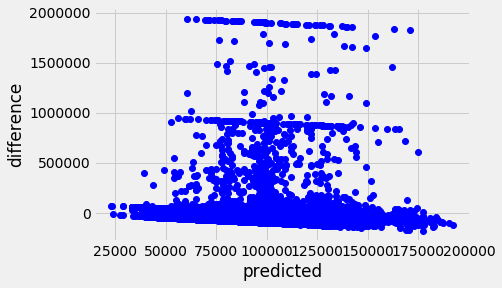

In [31]:
plt.plot(pred_vs_act['pred'], pred_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');

In [32]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(data_scienc_without_NaN, round(importance, 2)) for data_scienc_without_NaN, importance in zip(data_scienc_without_NaN_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: SkipMeals_1 - 2 times per week Importance: 0.06
Variable: HoursComputer_5 - 8 hours Importance: 0.05
Variable: HoursComputer_9 - 12 hours Importance: 0.05
Variable: HoursComputer_Over 12 hours Importance: 0.05
Variable: HoursOutside_1 - 2 hours Importance: 0.05
Variable: HoursOutside_30 - 59 minutes Importance: 0.05
Variable: SkipMeals_Never      Importance: 0.05
Variable: Exercise_1 - 2 times per week Importance: 0.05
Variable: WakeTime_Between 7:01 - 8:00 AM Importance: 0.04
Variable: HoursOutside_Less than 30 minutes Importance: 0.04
Variable: Exercise_3 - 4 times per week Importance: 0.04
Variable: Exercise_Daily or almost every day Importance: 0.04
Variable: WakeTime_Between 5:00 - 6:00 AM Importance: 0.03
Variable: WakeTime_Between 6:01 - 7:00 AM Importance: 0.03
Variable: WakeTime_Between 8:01 - 9:00 AM Importance: 0.03
Variable: WakeTime_Between 9:01 - 10:00 AM Importance: 0.03
Variable: HoursOutside_3 - 4 hours Importance: 0.03
Variable: SkipMeals_3 - 4 times per wee

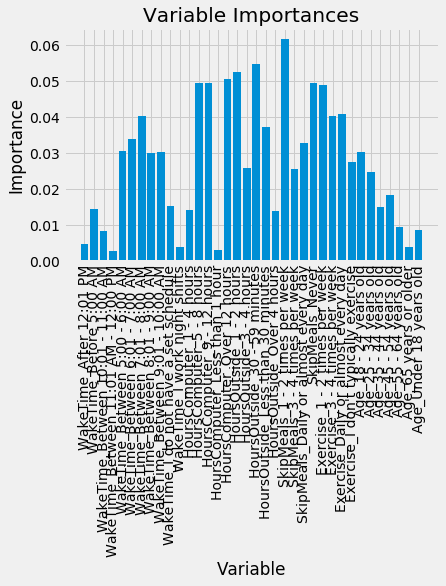

In [33]:
## Make a grap with the most importent values for the prediction
# Set the style
plt.style.use('fivethirtyeight')
# x values for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
#plt.bar(x_values, importances, orientation = 'horizontal')
# labels for x 
plt.xticks(x_values, data_scienc_without_NaN_list, rotation='vertical')
#plt.xticks(x_values, data_scienc_without_NaN_list, rotation='horizontal')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

## KNeighbors Regressor 

In [34]:
#ada_us = AdaBoostClassifier(learning_rate=5, n_estimators=500, random_state=12345)
#ada_us.fit_transform(X_train, y_train) # If this model was to predict for new individuals, we probably would want

knn_model = KNeighborsRegressor(n_neighbors=1)
knn_model.fit(X_train,y_train)
     
y_test_pred = knn_model.predict(X_test) #We can then use our fitted model to predict the salary for each
errors = abs(y_test_pred - y_test)
KN_r2_score = r2_score(y_test, y_test_pred)

# some check points to see how fare off the model is......
print('Predicted r2 score: ',r2_score(y_test, y_test_pred))  
print('Mean Squared Error:',mean_squared_error(y_test, y_test_pred)) 
print('Mean Absolute Error:', round(errors.mean(), 2), '$.')   
print('Predicted max value: ', y_test_pred.max())
print('Predicted min value: ',y_test_pred.min())
print('Predicted mean value: ',y_test_pred.mean())

Predicted r2 score:  -0.8536212762252828
Mean Squared Error: 50537292283.25162
Mean Absolute Error: 83542.27 $.
Predicted max value:  2000000.0
Predicted min value:  0.0
Predicted mean value:  91987.0984192474


In [35]:
pred_vs_act = pd.DataFrame(np.hstack([y_test.reshape(y_test.size,1), y_test_pred.reshape(y_test.size,1)]))
pred_vs_act.columns = ['actual', 'pred']
pred_vs_act['diff'] = pred_vs_act['actual'] - pred_vs_act['pred']
pred_vs_act.head()

,actual,pred,diff
0,5640.000000,95782.958115,-90142.958115
1,95782.958115,95782.958115,0.000000
2,91791.000000,64380.000000,27411.000000
3,18288.000000,96000.000000,-77712.000000
4,100000.000000,41612.000000,58388.000000


In [36]:
pred_vs_act['diff'].max()

2000000.0

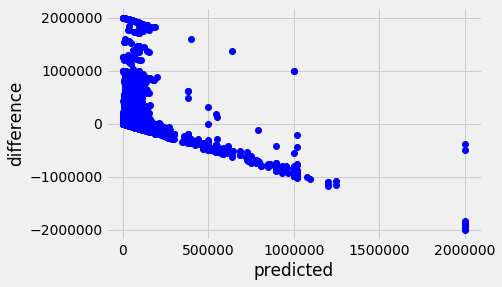

In [37]:
plt.plot(pred_vs_act['pred'], pred_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');

In [38]:
y_test_pred = knn_model.fit(X_train,y_train)
predictions = knn_model.predict(X_test)


In [39]:
print(y_test_pred)
print(predictions)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform')
[ 95782.95811496  95782.95811496  64380.         ...   4692.
  60000.         146868.        ]


In [40]:
test = knn_model.score(X_test, y_test)
test

-0.8536212762252828

In [41]:
#ax = sns.heatmap(confusion_matrix(y_test, predictions), annot = True, fmt = '',cmap="YlGnBu", cbar=False)
#ax = sns.heatmap(confusion_matrix(y_test, predictions), annot = True, fmt = '',cmap="YlGnBu", cbar=False)
#ax = sns.heatmap((y_test.argmax(axis=1), predictions.argmax(axis=1)))
#ax.set_xlabel('Predicted')
#ax.set_ylabel('Actual')
#ax.xaxis.set_label_position('top') 
#ax.xaxis.set_ticks_position('top')


## DecisionTreeRegressor

In [42]:

dtr_model = DecisionTreeRegressor( random_state = 1000,
                               max_depth=3, min_samples_leaf=5)     #"gini"


dtr_model.fit(X_train,y_train)


        
y_test_pred = dtr_model.predict(X_test) #We can then use our fitted model to predict the salary for each
errors = abs(y_test_pred - y_test)


# some check points to see how fare off the model is......
print('Predicted r2 score: ',r2_score(y_test, y_test_pred))  
print('Mean Squared Error:',mean_squared_error(y_test, y_test_pred)) 
print('Mean Absolute Error:', round(errors.mean(), 2), '$.')   
print('Predicted max value: ', y_test_pred.max())
print('Predicted min value: ',y_test_pred.min())
print('Predicted mean value: ',y_test_pred.mean())

Predicted r2 score:  0.01111588747247294
Mean Squared Error: 26961022766.65585
Mean Absolute Error: 59652.46 $.
Predicted max value:  126390.13734414426
Predicted min value:  67551.08303241731
Predicted mean value:  95990.42111878931


In [43]:
pred_vs_act = pd.DataFrame(np.hstack([y_test.reshape(y_test.size,1), y_test_pred.reshape(y_test.size,1)]))
pred_vs_act.columns = ['actual', 'pred']
pred_vs_act['diff'] = pred_vs_act['actual'] - pred_vs_act['pred']
pred_vs_act.head()

,actual,pred,diff
0,5640.000000,67551.083032,-61911.083032
1,95782.958115,83583.755313,12199.202802
2,91791.000000,98178.615093,-6387.615093
3,18288.000000,67551.083032,-49263.083032
4,100000.000000,126390.137344,-26390.137344


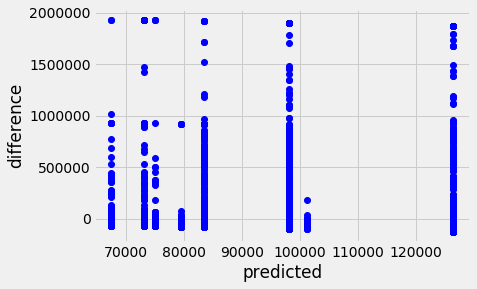

In [44]:
plt.plot(pred_vs_act['pred'], pred_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');

### AdaBoost Regressor

In [45]:
abr_model = AdaBoostRegressor( n_estimators = 500, random_state = 100)     

abr_model.fit(X_train,y_train)


        
y_test_pred = abr_model.predict(X_test) #We can then use our fitted model to predict the salary for each
errors = abs(y_test_pred - y_test)
ADB_r2_score = r2_score(y_test, y_test_pred)

# some check points to see how fare off the model is......
print('Predicted r2 score: ',r2_score(y_test, y_test_pred))  
print('Mean Squared Error:',mean_squared_error(y_test, y_test_pred)) 
print('Mean Absolute Error:', round(errors.mean(), 2), '$.')   
print('Predicted max value: ', y_test_pred.max())
print('Predicted min value: ',y_test_pred.min())
print('Predicted mean value: ',y_test_pred.mean())

Predicted r2 score:  0.010628449988947297
Mean Squared Error: 26974312304.756596
Mean Absolute Error: 60163.51 $.
Predicted max value:  133709.42884332905
Predicted min value:  67647.18876484218
Predicted mean value:  96741.55131924587


In [46]:
pred_vs_act = pd.DataFrame(np.hstack([y_test.reshape(y_test.size,1), y_test_pred.reshape(y_test.size,1)]))
pred_vs_act.columns = ['actual', 'pred']
pred_vs_act['diff'] = pred_vs_act['actual'] - pred_vs_act['pred']
pred_vs_act.head()

,actual,pred,diff
0,5640.000000,76703.150728,-71063.150728
1,95782.958115,84385.218373,11397.739742
2,91791.000000,100692.556704,-8901.556704
3,18288.000000,67647.188765,-49359.188765
4,100000.000000,125264.204431,-25264.204431


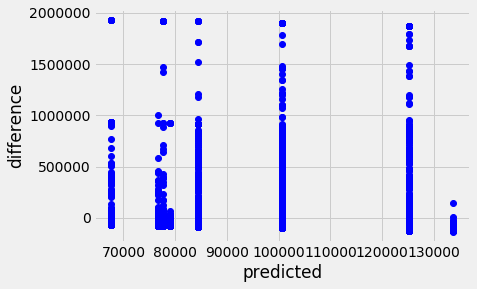

In [47]:
plt.plot(pred_vs_act['pred'], pred_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');

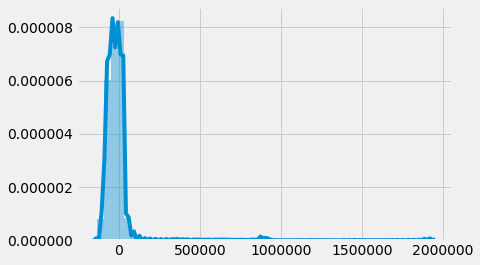

In [48]:
sns.distplot(y_test-y_test_pred)

## Show the r2_score

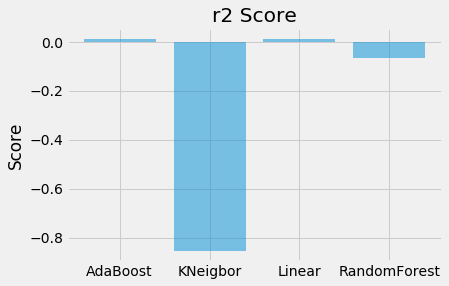

In [52]:
labels = ('AdaBoost', 'KNeigbor', 'Linear', 'RandomForest')
y = np.arange(len(labels))
performance = [ADB_r2_score, KN_r2_score, LR_r2_score, RF_r2_score]

plt.bar(y, performance, align = 'center', alpha = 0.5)
plt.xticks(y, labels)
plt.ylabel('Score')
plt.title('r2 Score')

plt.show()
